<a href="https://colab.research.google.com/github/russellheines/ml-experiments/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.1 Word-level one-hot encoding (toy example)

In [3]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

6.3 Using Keras for word-level one-hot encoding

In [4]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


6.5 Instantiating an Embedding layer

In [5]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

6.6 Loading the IMDB data for use with an Embedding layer

In [6]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


6.7 Using an Embedding layer and classifier on the IMDB data

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 0.6724 - acc: 0.6209 - val_loss: 0.6262 - val_acc: 0.6908
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5469 - acc: 0.7492 - val_loss: 0.5300 - val_acc: 0.7296
Epoch 3/10
625/625

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

782/782 [==============================] - 2s 2ms/step - loss: 0.5179 - acc: 0.7555


0.7554799914360046

6.21 Numpy implementation of a simple RNN

In [10]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)

  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

6.22 Preparing the IMDB data

In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


6.23 Training the model with Embedding and SimpleRNN layers

In [14]:
from keras.layers import SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 35s 203ms/step - loss: 0.6325 - acc: 0.6203 - val_loss: 0.5262 - val_acc: 0.7592
Epoch 2/10
157/157 [==============================] - 45s 285ms/step - loss: 0.4038 - acc: 0.8278 - val_loss: 0.3945 - val_acc: 0.8270
Epoch 3/10
157/157 [==============================] - 51s 328ms/step - loss: 0.3143 - acc: 0.8734 - val_loss: 0.3619 - val_acc: 0.8456
Epoch 4/10
157/157 [==============================] - 46s 291ms/step - loss: 0.2564 - acc: 0.8985 - val_loss: 0.3578 - val_acc: 0.8450
Epoch 5/10
157/157 [==============================] - 43s 276ms/step - loss: 0.2300 - acc: 0.9124 - val_loss: 0.4638 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 42s 269ms/step - loss: 0.1709 - acc: 0.9371 - val_loss: 0.4215 - val_acc: 0.8640
Epoch 7/10
157/157 [==============================] - 29s 184ms/step - loss: 0.1411 - acc: 0.9494 - val_loss: 0.4735 - val_acc: 0.8418
Epoch 8/10
157/157 [==============================] - 3

6.24 Plotting results

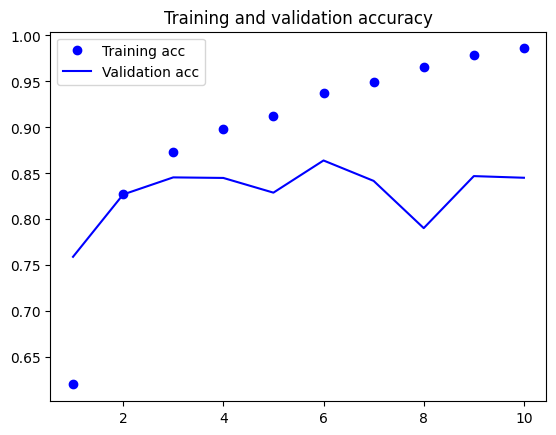

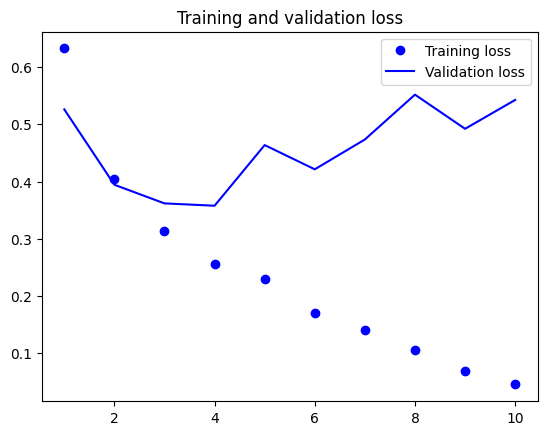

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

6.27 Using the LSTM later in Keras

In [17]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 68s 405ms/step - loss: 0.5977 - acc: 0.6655 - val_loss: 0.4474 - val_acc: 0.8202
Epoch 2/10
157/157 [==============================] - 66s 419ms/step - loss: 0.3568 - acc: 0.8536 - val_loss: 0.3357 - val_acc: 0.8718
Epoch 3/10
157/157 [==============================] - 61s 388ms/step - loss: 0.2698 - acc: 0.8956 - val_loss: 0.2992 - val_acc: 0.8844
Epoch 4/10
157/157 [==============================] - 61s 384ms/step - loss: 0.2259 - acc: 0.9137 - val_loss: 0.2824 - val_acc: 0.8854
Epoch 5/10
157/157 [==============================] - 60s 381ms/step - loss: 0.1975 - acc: 0.9283 - val_loss: 0.3860 - val_acc: 0.8702
Epoch 6/10
157/157 [==============================] - 61s 391ms/step - loss: 0.1760 - acc: 0.9359 - val_loss: 0.3452 - val_acc: 0.8596
Epoch 7/10
157/157 [==============================] - 60s 381ms/step - loss: 0.1619 - acc: 0.9437 - val_loss: 0.3259 - val_acc: 0.8718
Epoch 8/10
157/157 [==============================] - 6